In [37]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from itertools import product
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [29]:
df = aux.load_data(Path("../results_synced/ratio/"))
#df.groupby(["dataset", "arch", "nsamp_tra", "nsamp_pre"]).count()
#df = df[df["fold_number"] == 1]
#df[df["pretrained"]]["target_best_model"].str.split("/").str[6].str.removeprefix("epoch=").str.split("-").str[0].astype(int).hist()
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_size,target_val_acc,target_val_f1,target_val_auroc,...,target_nepochs,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_acc,pretrain_val_f1,pretrain_val_auroc,pretrain_best_model,pretrain_train_csv,pretrain_nepochs
0,GunPoint,CNN_DFS,False,3,0,128,5,0.481771,0.481771,0.272144,...,120,1227,0,5985,NaN,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN_DFS,True,3,0,128,5,0.473958,0.473958,0.618878,...,120,1227,3627,5985,0.825521,0.825521,0.968399,training/exp/EXP_ratio_f3.0_2023-03-07_14-24/l...,training/exp/EXP_ratio_f3.0_2023-03-07_14-24/l...,60.0
2,GunPoint,CNN_DFS,True,3,0,128,5,0.528646,0.528646,0.686405,...,120,1227,7254,5985,0.822780,0.822780,0.957245,training/exp/EXP_ratio_f3.0_2023-03-07_14-46/l...,training/exp/EXP_ratio_f3.0_2023-03-07_14-46/l...,60.0
3,GunPoint,CNN_DFS,True,3,0,128,5,0.541667,0.541667,0.682276,...,120,1227,10881,5985,0.839007,0.839007,0.968910,training/exp/EXP_ratio_f3.0_2023-03-07_15-10/l...,training/exp/EXP_ratio_f3.0_2023-03-07_15-10/l...,60.0
4,GunPoint,CNN_DFS,True,3,0,128,5,0.585938,0.585938,0.647290,...,120,1227,14508,5985,0.817640,0.817640,0.966312,training/exp/EXP_ratio_f3.0_2023-03-07_15-35/l...,training/exp/EXP_ratio_f3.0_2023-03-07_15-35/l...,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,PowerCons,CNN_TS,True,0,0,128,5,0.662667,0.662667,0.690809,...,120,10497,6246,10353,0.713867,0.713867,0.925649,training/exp/EXP_ratio_f0.4_2023-03-09_22-54/l...,training/exp/EXP_ratio_f0.4_2023-03-09_22-54/l...,60.0
1458,PowerCons,CNN_TS,True,0,0,128,5,0.665458,0.665458,0.700110,...,120,10497,12492,10353,0.732422,0.732422,0.917488,training/exp/EXP_ratio_f0.4_2023-03-09_23-09/l...,training/exp/EXP_ratio_f0.4_2023-03-09_23-09/l...,60.0
1459,PowerCons,CNN_TS,True,0,0,128,5,0.666295,0.666295,0.707757,...,120,10497,18739,10353,0.725287,0.725287,0.911184,training/exp/EXP_ratio_f0.4_2023-03-09_23-26/l...,training/exp/EXP_ratio_f0.4_2023-03-09_23-26/l...,60.0
1460,PowerCons,CNN_TS,True,0,0,128,5,0.663225,0.663225,0.710990,...,120,10497,24985,10353,0.733534,0.733534,0.906381,training/exp/EXP_ratio_f0.4_2023-03-09_23-46/l...,training/exp/EXP_ratio_f0.4_2023-03-09_23-46/l...,60.0


In [30]:
# how many are done?
df.groupby(["arch", "dataset"])["pretrained"].count()

arch       dataset  
CNN_DFS    Coffee       101
           GunPoint     150
CNN_TS     Coffee       150
           GunPoint     150
           PowerCons     68
RNN_TS     Coffee       150
           GunPoint     150
           PowerCons    128
ResNet_TS  Coffee       150
           GunPoint     150
           PowerCons    115
Name: pretrained, dtype: int64

In [31]:
dfp = aux.EXP_ratio_preprocessing(df)
dfp

,arch,dataset,nsamp_pre,nsamp_tra,pretrain_val_acc_mean,pretrain_val_acc_std,pretrain_val_auroc_mean,pretrain_val_auroc_std,pretrain_val_f1_mean,pretrain_val_f1_std,...,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_DFS,Coffee,0,683,NaN,NaN,NaN,NaN,NaN,NaN,...,0.400484,0.023484,0.446940,0.014638,0.312500,0.000000,0.000000,0.000000,0.312500,0.000000
1,CNN_DFS,Coffee,1998,683,0.816016,0.014567,0.920877,0.030793,0.816016,0.014567,...,0.491545,0.031059,0.521240,0.025090,0.815430,0.019499,0.789808,0.029437,0.815430,0.019499
2,CNN_DFS,Coffee,3997,683,0.849023,0.016602,0.945618,0.017219,0.849023,0.016602,...,0.489140,0.023935,0.512689,0.027834,0.813477,0.077823,0.802148,0.077030,0.813477,0.077823
3,CNN_DFS,Coffee,5996,683,0.867310,0.006910,0.956737,0.006788,0.867310,0.006910,...,0.491285,0.020139,0.513277,0.023649,0.829102,0.038456,0.832013,0.084546,0.829102,0.038456
4,CNN_DFS,Coffee,7995,683,0.868955,0.004787,0.960405,0.002402,0.868955,0.004787,...,0.489830,0.023262,0.489652,0.008916,0.717773,0.098686,0.811097,0.077109,0.717773,0.098686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,ResNet_TS,PowerCons,6246,10497,0.765788,0.019830,0.925093,0.005361,0.765788,0.019830,...,0.695522,0.060159,0.650553,0.031177,0.649647,0.037216,0.697425,0.026163,0.649647,0.037216
326,ResNet_TS,PowerCons,12492,10497,0.783122,0.034618,0.932624,0.008750,0.783122,0.034618,...,0.672852,0.062997,0.644596,0.025025,0.653832,0.030749,0.661966,0.038922,0.653832,0.030749
327,ResNet_TS,PowerCons,18739,10497,0.740965,0.085778,0.918521,0.004753,0.740965,0.085778,...,0.678624,0.082761,0.643880,0.044936,0.649275,0.022731,0.681559,0.048572,0.649275,0.022731
328,ResNet_TS,PowerCons,24985,10497,0.775881,0.004034,0.931482,0.010305,0.775881,0.004034,...,0.664743,0.024237,0.642025,0.023742,0.647228,0.033927,0.657316,0.054961,0.647228,0.033927


In [32]:
dfpb = aux.EXP_ratio_set_baselines(dfp)
dfpb

,arch,dataset,nsamp_pre,nsamp_tra,target_test_acc_mean,target_test_acc_std,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_DFS,Coffee,1998,683,0.0743,0.039728,0.091061,0.054543,0.0743,0.039728,0.50293,0.019499,0.789808,0.029437,0.50293,0.019499
1,CNN_DFS,Coffee,3997,683,0.065749,0.042472,0.088657,0.047419,0.065749,0.042472,0.500977,0.077823,0.802148,0.07703,0.500977,0.077823
2,CNN_DFS,Coffee,5996,683,0.066337,0.038287,0.090801,0.043623,0.066337,0.038287,0.516602,0.038456,0.832013,0.084546,0.516602,0.038456
3,CNN_DFS,Coffee,7995,683,0.042712,0.023553,0.089346,0.046746,0.042712,0.023553,0.405273,0.098686,0.811097,0.077109,0.405273,0.098686
4,CNN_DFS,Coffee,9995,683,0.048578,0.03571,0.089532,0.032057,0.048578,0.03571,0.436523,0.097389,0.815554,0.082905,0.436523,0.097389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,ResNet_TS,PowerCons,6246,10497,0.017424,0.064826,0.011783,0.117548,0.017424,0.064826,0.013486,0.074562,0.024094,0.082655,0.013486,0.074562
271,ResNet_TS,PowerCons,12492,10497,0.011466,0.058675,-0.010887,0.120386,0.011466,0.058675,0.017671,0.068096,-0.011365,0.095414,0.017671,0.068096
272,ResNet_TS,PowerCons,18739,10497,0.01075,0.078585,-0.005115,0.140149,0.01075,0.078585,0.013114,0.060078,0.008229,0.105064,0.013114,0.060078
273,ResNet_TS,PowerCons,24985,10497,0.008895,0.057391,-0.018996,0.081625,0.008895,0.057391,0.011068,0.071274,-0.016014,0.111453,0.011068,0.071274


In [36]:
print(dfp.arch.unique())
print(dfp.dataset.unique())

['CNN_DFS' 'CNN_TS' 'RNN_TS' 'ResNet_TS']
['Coffee' 'GunPoint' 'PowerCons']


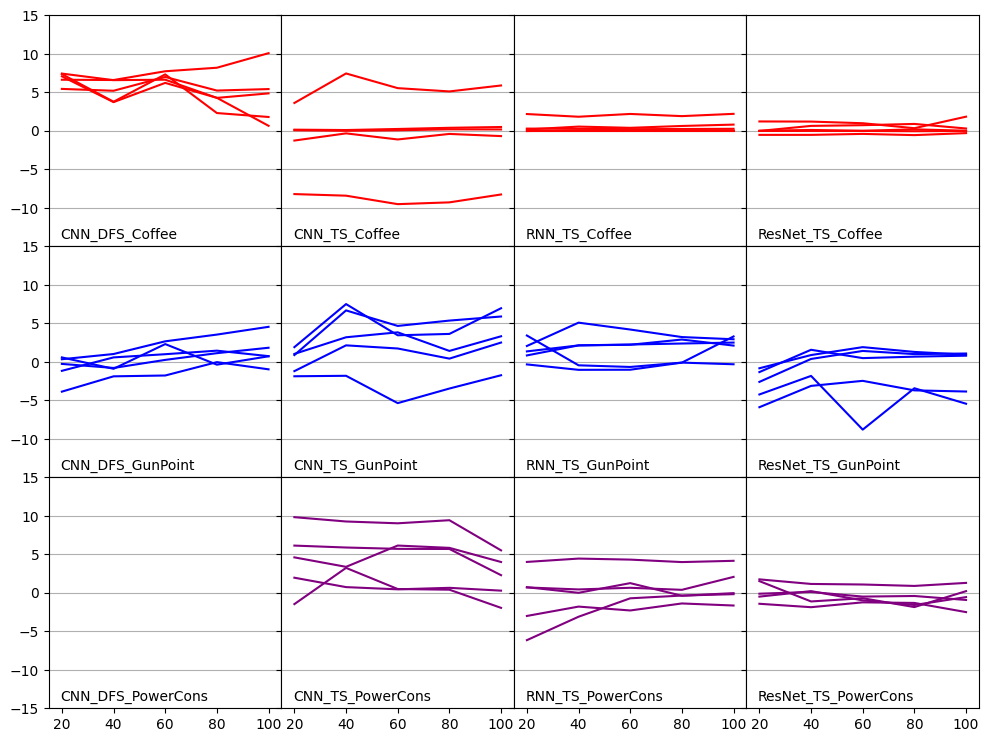

In [60]:
archs = ['CNN_DFS', 'CNN_TS', 'RNN_TS', 'ResNet_TS']
dsets = ['Coffee', 'GunPoint', 'PowerCons']

n_rows = len(dsets)
n_cols = len(archs)

fig = plt.figure(figsize=[3*n_cols, 3*n_rows])
gs = fig.add_gridspec(n_rows, n_cols, 
    #left=0.03, right=0.48, bottom=0.05,
    wspace=0., hspace=0
    )

metric = "acc"

colors = {
    "GunPoint": "blue",
    "Coffee": "red",
    "PowerCons": "purple",
    "Plane": "green",
    "CBF": "orange"
}

axes: dict[str, plt.Axes] = {}
for i, arch in enumerate(archs):
    for j, dset in enumerate(dsets):
        axes[f"{arch}_{dset}"] = fig.add_subplot(gs[j,i])

for arch_dset in axes:
    
    ax = axes[arch_dset]
    
    ax.set_xlim(15, 105)
    ax.set_xticks(np.arange(20,101,20))

    ax.set_ylim(-15, 15)
    
    ax.grid(axis="y")

    # if "TS" in arch:
    #     ax.set_ylim(-10, 10)
    #     ax.set_yticks([-10, -8, -6,  -4, -2, 0, 2, 4, 6, 8, 10])

    if archs[0] not in arch_dset:
        ax.set_yticklabels([])

    if dsets[-1] not in arch_dset:
        ax.set_yticks([-10, -5, 0, 5, 10, 15])
        ax.set_xticklabels([])
    else:
        ax.set_yticks([-15, -10, -5, 0, 5, 10, 15])

    ax.annotate(arch_dset, (0.05, 0.05), xycoords='axes fraction', va='center')


for (arch, dset, nsamp_tra), dfg in dfpb.groupby(["arch", "dataset", "nsamp_tra"]):
    x_values = [20, 40, 60, 80, 100]
    axes[f"{arch}_{dset}"].errorbar(x_values[:len(dfg)], dfg[f"target_test_{metric}_mean"]*100, 
        #yerr=dfg[f"target_test_{metric}_std"],         
        label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[dset])
